# **EDA_Summer_Olympic_Data**
# **By Amit Kharche**
**Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **Artificial intelligence (AI)**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1. What is the distribution of passenger satisfaction levels?**](#section81)<br>
  - [**8.2. How does satisfaction vary across different travel classes (Eco, Eco Plus, Business)?**](#section82)<br>
  - [**8.3. Are loyal customers more likely to be satisfied than disloyal customers?**](#section83)<br>
  - [**8.4. Does gender have any noticeable impact on satisfaction ratings?**](#section84)<br>
  - [**8.5. What is the age distribution of passengers, and how does age relate to satisfaction?**](#section85)<br>
  - [**8.6. Do passengers traveling for business report higher satisfaction than those on personal trips?**](#section86)<br>
  - [**8.7. How do service quality ratings (e.g., Food, Seat Comfort, Inflight Entertainment) affect satisfaction?**](#section87)<br>
  - [**8.8. What is the impact of flight delays (departure or arrival) on satisfaction?**](#section88)<br>
  - [**8.9. Which inflight services are rated the lowest and highest on average?**](#section89)<br>
  - [**8.10. Is there a correlation between flight distance and passenger satisfaction?**](#section810)<br>
  - [**8.11. Does online check-in or ease of booking influence how satisfied passengers feel?**](#section811)<br>
  - [**8.12. What combination of features most strongly predicts passenger satisfaction?**](#section812)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section9.1)<br>
  - **9.2** [**Actionable Insights***](#Section9.1)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

The Summer Olympics represent one of the most prestigious and historic sporting events in the world, bringing together athletes from across the globe to compete in a wide array of disciplines. This dataset provides a comprehensive record of medal winners from the modern Olympic Games, starting from Athens 1896 through to Los Angeles 1984. It spans over 20 Olympic editions, capturing the evolution of sports, the rise of legendary athletes, and the shifting dynamics of global athletic performance.

The dataset includes detailed information on:

Year and Host City
Sport and Discipline
Athlete Name
Country
Gender
Event
Medal Type (Gold, Silver, Bronze)

---

---
<a name = Section2></a>
# **2. Problem Statement**
---
The goal of this project is to perform Exploratory Data Analysis (EDA) on the Summer Olympics dataset to uncover patterns, trends, and insights related to:

Medal distribution across countries and years
Dominant sports and disciplines
Gender participation and performance
Athlete achievements and historical milestones
Host city influence on medal outcomes
By analyzing this dataset, we aim to answer key questions such as:

Which countries have been the most successful over time?
How has gender representation evolved in Olympic events?
What are the most medal-rich sports?
Are there any notable trends or anomalies in medal distribution?

---
<center><img style="width:80%; height:300px" src="https://www.zilliondesigns.com/blog/wp-content/uploads/Summer-Olympic-Logos.png"  height="300" width="">

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install ydata_profiling

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section33></a>
### **3.3 Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                        # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import matplotlib.pyplot as plt                 # Importing pyplot interface of matplotlib
import seaborn as sns                           # Importing seaborn library for interactive visualization
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

This section focuses on acquiring the dataset and understanding its key features.

The data is sourced from an **airline passenger survey**, capturing detailed feedback on individual travel experiences. It contains **83,123 records** representing both **satisfied** and **dissatisfied** passengers.

The dataset includes a mix of **demographic information**, **travel-related attributes**, **service quality ratings**, and **flight performance metrics**.

Below is the detailed description of each feature in the dataset:

```
| Id  | Feature                              | Description                                                                 |
|-----|--------------------------------------|-----------------------------------------------------------------------------|
| 01  | id                                   | Unique identifier for each passenger record                                |
| 02  | Gender                               | Passenger gender (`Male` or `Female`)                                      |
| 03  | Customer Type                        | Indicates loyalty status (`Loyal Customer` or `Disloyal Customer`)         |
| 04  | Age                                  | Passenger age in years                                                     |
| 05  | Type of Travel                       | Purpose of travel (`Business travel` or `Personal Travel`)                 |
| 06  | Class                                | Travel class (`Business`, `Eco`, or `Eco Plus`)                            |
| 07  | Flight Distance                      | Distance flown in miles                                                    |
| 08  | Inflight wifi service               | Rating (0–5) of the inflight Wi-Fi service                                 |
| 09  | Departure/Arrival time convenient   | Rating (0–5) of time convenience for departure and arrival                 |
| 10  | Ease of Online booking              | Rating (0–5) of the online booking process                                 |
| 11  | Gate location                        | Rating (0–5) of gate location accessibility                                |
| 12  | Food and drink                       | Rating (0–5) of food and beverage quality                                  |
| 13  | Online boarding                      | Rating (0–5) of the online check-in experience                             |
| 14  | Seat comfort                         | Rating (0–5) of seating comfort                                            |
| 15  | Inflight entertainment              | Rating (0–5) of inflight entertainment options                             |
| 16  | On-board service                     | Rating (0–5) of general service onboard                                    |
| 17  | Leg room service                     | Rating (0–5) of legroom provided                                           |
| 18  | Baggage handling                     | Rating (0–5) of baggage handling process                                   |
| 19  | Checkin service                      | Rating (0–5) of the check-in process                                       |
| 20  | Inflight service                     | Rating (0–5) of in-flight customer service                                 |
| 21  | Cleanliness                          | Rating (0–5) of the overall cabin cleanliness                              |
| 22  | Departure Delay in Minutes           | Minutes of delay at departure                                              |
| 23  | Arrival Delay in Minutes             | Minutes of delay at arrival (may contain missing values)                   |
| 24  | satisfaction                         | Target label: `satisfied` or `neutral or dissatisfied`                     |
```

> **Note**: Missing values appear only in `Arrival Delay in Minutes`.
> All rating fields are on a **0 to 5 scale**, where 5 indicates the highest level of satisfaction.

The dataset offers a holistic view of the passenger journey, enabling analysis across **pre-flight**, **inflight**, and **post-flight** service domains.

---

In [2]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_Summer_Olympic_Data_amit_kharche/summer_olympics.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (31165, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<a id=section301></a>
### Data Description

* The dataset consist information of passenger borading and deboarding information and the services provided during the travel in flight.
* Dataset has __83123 Observation__ and __24 columns__. Below is the name of the column and their description.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,31165.0,1970.482785,33.158416,1896.0,1948.0,1980.0,2000.0,2012.0


### **Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


**Observation**

  - The train set has **83123 samples (rows)** and **24 columns**.
 
  - There are **19 columns** with a **numeric** datatype and **5 columns** with an **object** datatype.
  
  - There are **missing** values in the data.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __bd_train_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [7]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:02<00:00, 10.43it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section6></a>
# **6. Data Cleaning**
---

In [6]:
#Handling Missing Values
data['Country'].fillna('Unknown', inplace=True)

In [7]:
# Removing Duplicates
data.drop_duplicates(inplace=True)

In [9]:
#Data Type Conversion
data['Year'] = data['Year'].astype(int)

<a id=section7></a>
---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

####  Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __avocado_train_after_preprocessing.html__.

In [45]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:00<00:00, 32.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a id=section81></a>
**8.1. What is the distribution of passenger satisfaction levels?**

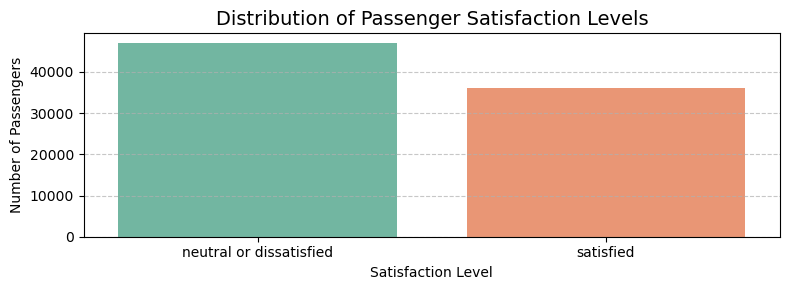

### Observation:


<a id=section82></a>
**8.2. How does satisfaction vary across different travel classes (Eco, Eco Plus, Business)?**

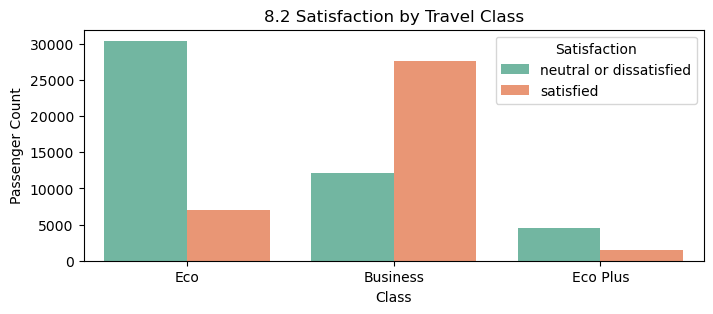

### Observation:



<a id=section83></a>
**8.3. Are loyal customers more likely to be satisfied than disloyal customers?**

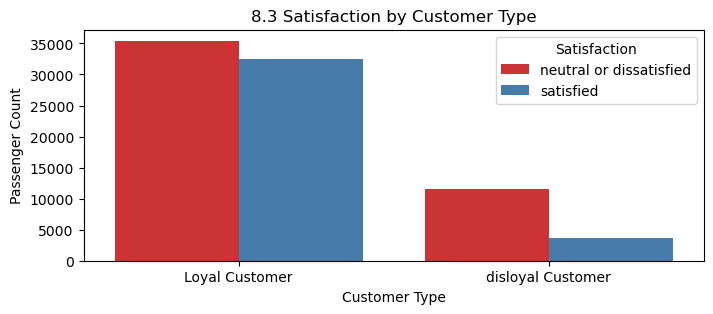

### Observation:



<a id=section84></a>
**8.4. Does gender have any noticeable impact on satisfaction ratings?**

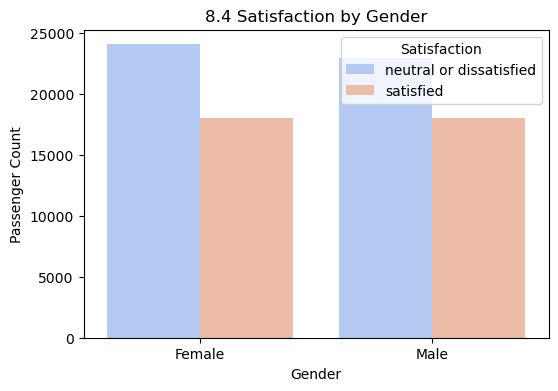

### Observation:



<a id=section85></a>
**8.5. What is the age distribution of passengers, and how does age relate to satisfaction?**

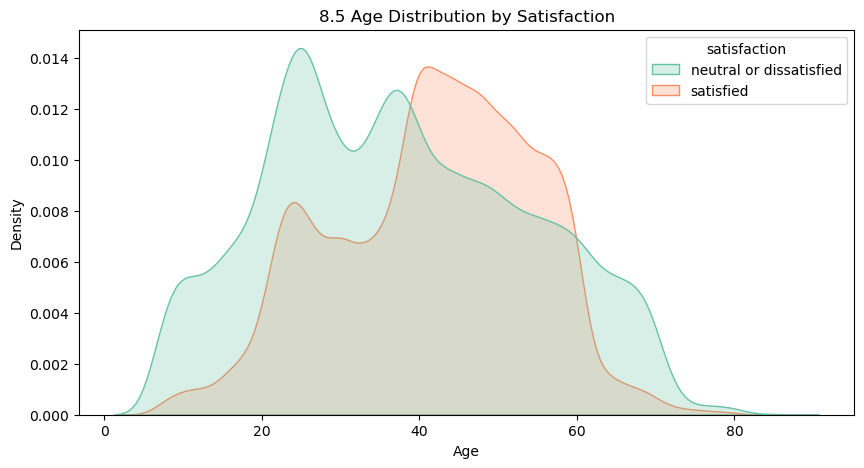

### Observation:




<a id=section86></a>
**8.6. Do passengers traveling for business report higher satisfaction than those on personal trips?**

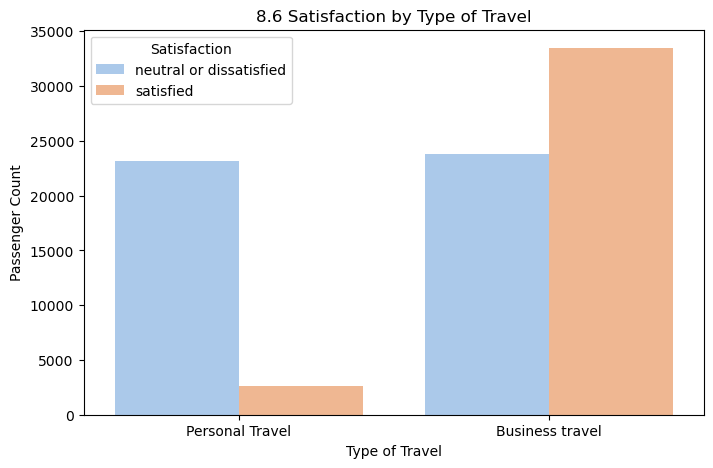

### Observation:




<a id=section87></a>
**8.7. How do service quality ratings (e.g., Food, Seat Comfort, Inflight Entertainment) affect satisfaction?**

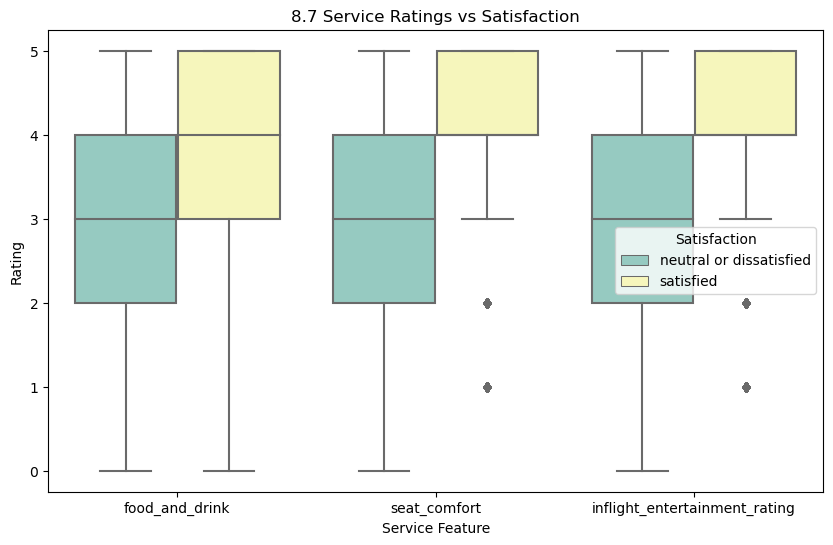

### Observation:



<a id=section88></a>
**8.8. What is the impact of flight delays (departure or arrival) on satisfaction?**

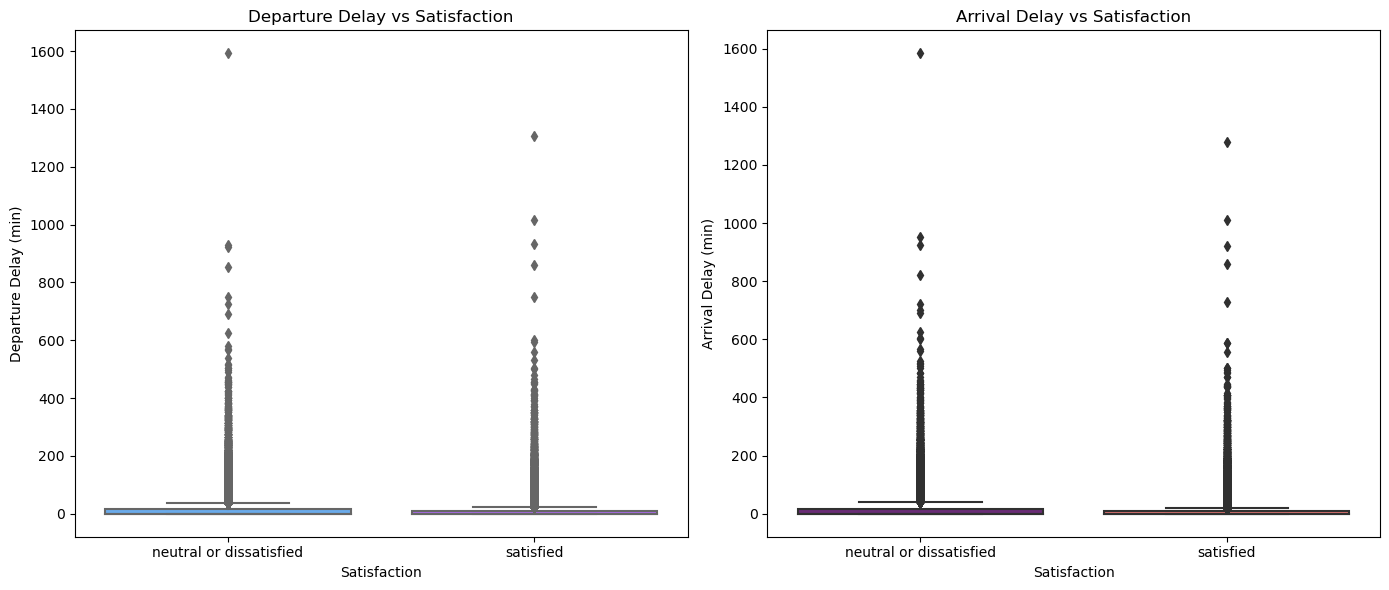

### Observation:



<a id=section89></a>
**8.9. Which inflight services are rated the lowest and highest on average?**

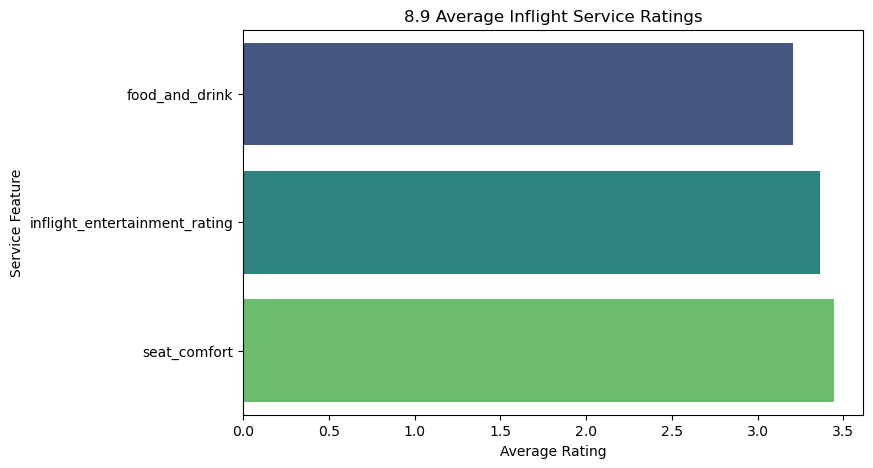

### Observation:



<a id=section810></a>
**8.10. Is there a correlation between flight distance and passenger satisfaction?**

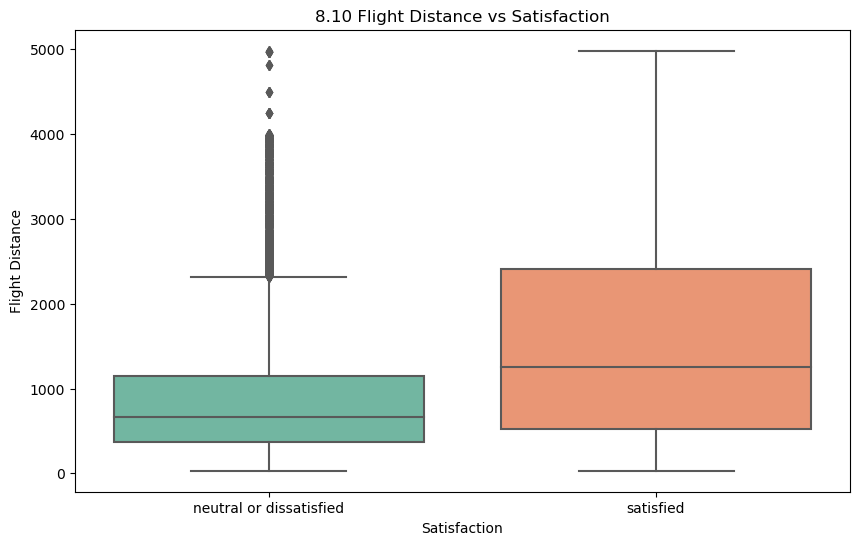

### Observation:



<a id=section811></a>
**8.11. Does online check-in or ease of booking influence how satisfied passengers feel?**

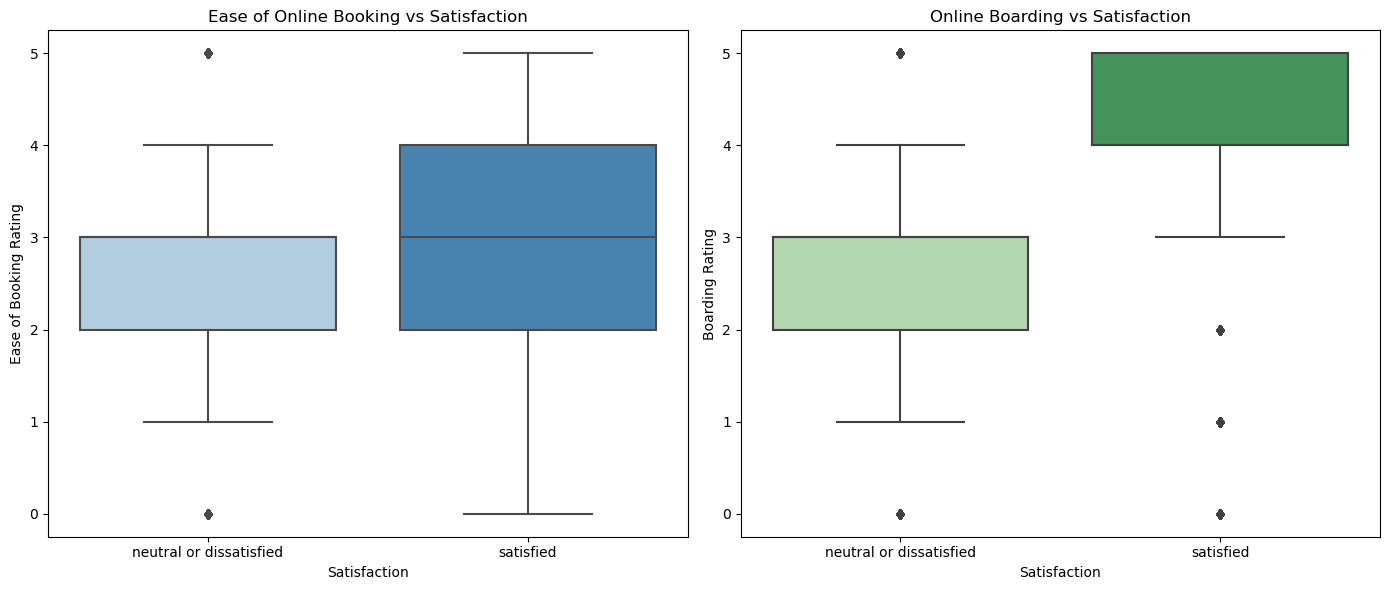

### Observation:



<a id=section812></a>
**8.12. What combination of features most strongly predicts passenger satisfaction?**

### Observation:



---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section9.1></a>
### **9.1 Conclusion**

* Passenger satisfaction is influenced by a combination of **service quality**, **flight experience**, and **demographic factors**.
* **Business class travelers**, **loyal customers**, and **older age groups** show higher satisfaction, suggesting these segments receive or perceive better service.
* Service components like **seat comfort**, **inflight entertainment**, and **online boarding** play a critical role in determining overall satisfaction.
* **Delays in flight schedules** significantly correlate with dissatisfaction, indicating the importance of operational efficiency.
* While gender does not majorly impact satisfaction, **flight distance**, **purpose of travel**, and **digital touchpoints** like booking and check-in show clear patterns in passenger sentiment.


<a name = Section9.2></a>
### **9.2 Actionable Insights**


1. **Enhance Service in Economy Class**

   * Focus on improving comfort, food quality, and entertainment for **Eco class** passengers to elevate their experience.

2. **Reward and Retain Loyal Customers**

   * Maintain high service standards and personalized perks for **loyal customers** to drive long-term satisfaction and retention.

3. **Prioritize On-time Performance**

   * Invest in **operations and schedule management** to reduce both departure and arrival delays and improve satisfaction scores.

4. **Upgrade Digital Interfaces**

   * Improve the **ease of online booking** and **online boarding** processes to enhance the digital customer journey, especially for tech-savvy users.

5. **Target Personal Travelers with Value Offers**

   * Since **business travelers** are generally more satisfied, develop strategies and bundled offerings to **boost satisfaction for personal travelers**.

6. **Focus on High-impact Amenities**

   * Features like **seat comfort**, **entertainment**, and **cleanliness** should be continuously optimized as they strongly correlate with satisfaction.

7. **Customize Experience by Age Segment**

   * Offer tailored experiences or communication strategies for **younger passengers** to address their dissatisfaction trends.

8. **Monitor and Leverage Flight Distance**

   * Since **longer flights correlate with higher satisfaction**, ensure that short-haul flights receive **proportional quality** attention to bridge the gap.

9. **Use Correlation Patterns to Align Services**

   * Leverage high correlations among onboard services (e.g., **check-in, boarding, cleanliness**) to create **integrated service improvement plans**.
